In [1]:
library(PopGenome)

Warning message:
"package 'PopGenome' was built under R version 3.6.3"
Loading required package: ff

Warning message:
"package 'ff' was built under R version 3.6.3"
Loading required package: bit

Warning message:
"package 'bit' was built under R version 3.6.2"
Attaching package bit

package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)

creators: bit bitwhich

coercion: as.logical as.integer as.bit as.bitwhich which

operator: ! & | xor != ==

querying: print length any all min max range sum summary

bit access: length<- [ [<- [[ [[<-

for more help type ?bit


Attaching package: 'bit'


The following object is masked from 'package:base':

    xor


Attaching package ff

- getOption("fftempdir")=="C:/Users/Samiksha/AppData/Local/Temp/Rtmpea87pK"


- getOption("ffextension")=="ff"


- getOption("ffdrop")==TRUE


- getOption("fffinonexit")==TRUE


- getOption("ffpagesize")==65536


- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes


- g

This code shows how to calculate and plot the mean SFS for the coding region of each of the genes in the polarity establishment network 

In [2]:
par1 <- readVCF("Elegans.vcf.gz",1000,"V",14112034,14141119,gffpath="Elegans_CDS_par1.gff3")


GFF information ...
vcff::open : file opened, contains 330 samples
[1] "Available ContigIdentifiers (parameter tid):"
[1] "I"     "II"    "III"   "IV"    "V"     "X"     "MtDNA"
|            :            |            :            | 100 %
|====================================================


Read in data and then split it into subsites that consist of the coding region 

In [3]:
splitpar1 <- splitting.data(par1, subsites="coding")

opening ff C:/Users/Samiksha/AppData/Local/Temp/Rtmpea87pK/ff3a4c7e60344c.ff



|            :            |            :            | 100 %
|====================================================

In [4]:
splitpar1@region.names

[1] "14112802 - 14112915" "14112966 - 14113083" "14113569 - 14113814"
 [4] "14115458 - 14115582" "14116447 - 14116680" "14117503 - 14117770"
 [7] "14120061 - 14120643" "14120733 - 14121018" "14121369 - 14121512"
[10] "14122208 - 14122315" "14122994 - 14123797" "14126111 - 14126243"
[13] "14131640 - 14131854" "14132840 - 14132941" "14133227 - 14133295"

The above cell shows the region names, which are the exons based on the annotation file you read in. Now detail.stats can be used to calculate the minor allele frequencies to calculate the frequency of the SNPs in each window

In [5]:
splitpar1 <- detail.stats(splitpar1)

|            :            |            :            | 100 %
|

opening ff C:/Users/Samiksha/AppData/Local/Temp/Rtmpea87pK/ff3a4c2103c35.ff



The below function calculates the mean of the frequencies in each window 

In [6]:
SFSmeanpar1 <- sapply(splitpar1@region.stats@minor.allele.freqs, function(x){
if(length(x)==0){return(0)}
return(mean(x[1,], na.rm=TRUE))
})

In [7]:
ids <- 1:length(splitpar1@region.names)

Now we can smooth the lines and plot the result

In [8]:
loess.SFSmeanpar1 <- loess(SFSmeanpar1~ids, span=1)

Main issue I am having is how to label the x axis. The labels should correspond to the length of the coding region in my opinion since the mean SFS for the coding region is being calculated here. I tried to do that by calling axis() but that does not seem to work. I am trying to figure out how to get the xaxis labelled 

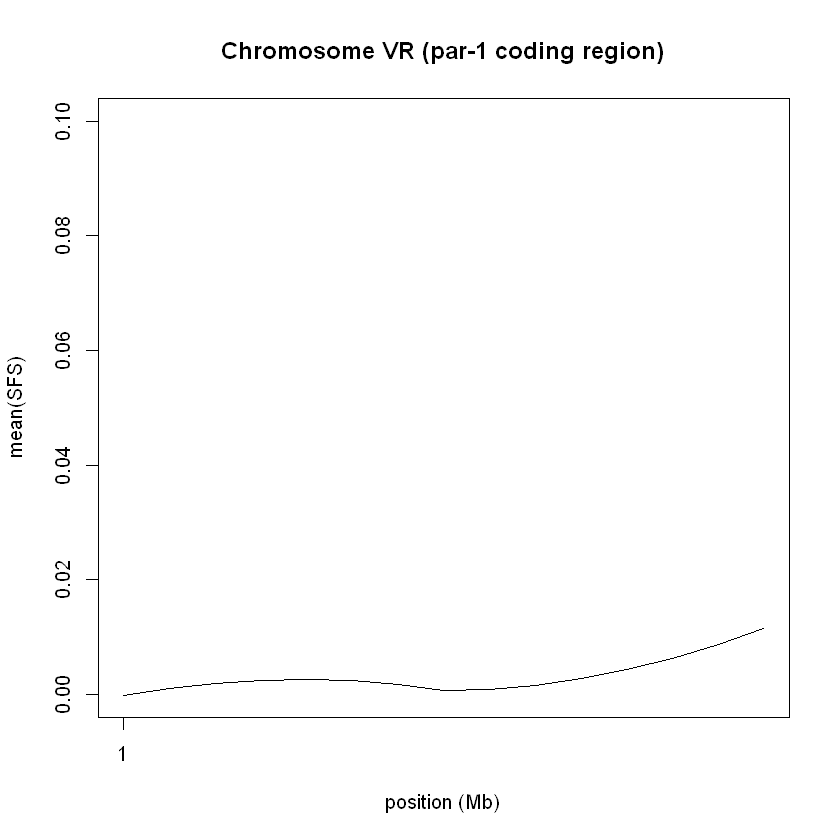

In [26]:
plot(predict(loess.SFSmeanpar1), type = "l", xaxt="n", xlab="position (Mb)",
ylab="mean(SFS)", main = "Chromosome VR (par-1 coding region)", ylim=c(0,0.1))
axis(1, at = seq(1, 3579, by = 1000), las=1)

The other issue I am having is with the span option within the loess method. The span is what determines the extent of smoothing and for par-5, mlc-4, rho-1 and cdc-37 I get the warning messages seen below about the span being too low, even when I set the span as high as a 100. I am looking into how to optimize the span 


GFF information ...
vcff::open : file opened, contains 330 samples
[1] "Available ContigIdentifiers (parameter tid):"
[1] "I"     "II"    "III"   "IV"    "V"     "X"     "MtDNA"
|            :            |            :            | 100 %
|====================================================


opening ff C:/Users/Samiksha/AppData/Local/Temp/Rtmpea87pK/ff3a4c66363cf1.ff



|            :            |            :            | 100 %
|====================================================|            :            |            :            | 100 %
|

opening ff C:/Users/Samiksha/AppData/Local/Temp/Rtmpea87pK/ff3a4c3b1a5424.ff



Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 3"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 3"
Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"


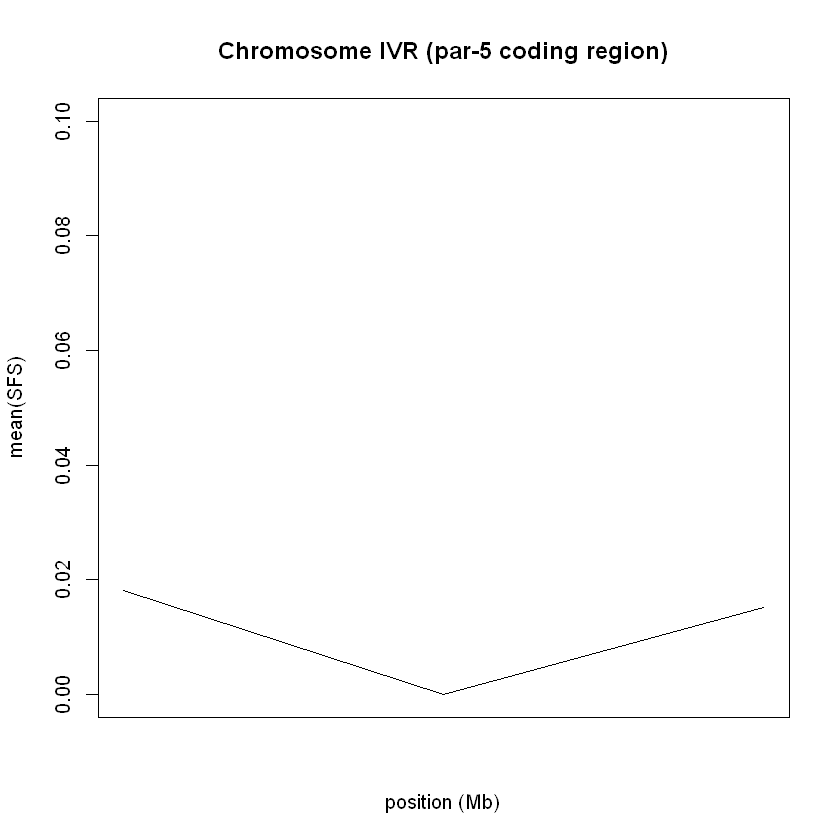

In [25]:
par5 <- readVCF("Elegans.vcf.gz",1000,"IV",11820991,11821897,gffpath="Elegans_CDS_par5.gff3")
splitpar5 <- splitting.data(par5, subsites="coding")
splitpar5 <- detail.stats(splitpar5)
SFSmeanpar5 <- sapply(splitpar5@region.stats@minor.allele.freqs, function(x){
if(length(x)==0){return(0)}
return(mean(x[1,], na.rm=TRUE))
})
ids <- 1:length(splitpar5@region.names)
loess.SFSmeanpar5 <- loess(SFSmeanpar5~ids, span=100)
plot(predict(loess.SFSmeanpar5), type = "l", xaxt="n", xlab="position (Mb)",
ylab="mean(SFS)", main = "Chromosome IVR (par-5 coding region)", ylim=c(0,0.1))